In [19]:
import os
import numpy as np
#setting the current working directory
#os.chdir('/Users/boltzmann/Dropbox/VUmc/Topology_Behavior/Backup_Pierre')
os.getcwd()
import glob
#Getting the files addresses no need / in the begging
files = glob.glob('HCP_AAL_Young_Adult/functional_connectivity/*functional_connectivity.txt')
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [27]:
# The whole 100 individuals Cohort is in this list, each individual is in Cohort[i]
import pandas as pd
Cohort=[]
for i in range(0,len(files)):
    df=pd.read_csv(files[i],header=None)
    #df = df.iloc[:-1 , :]
    # if needed, some cleaning step could be done in this stage here
    Cohort.append(np.abs(df))

In [28]:
Cohort[0]

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1.000000,0.854184,0.527754,0.268767,0.279529,0.310819,0.518997,0.382118,0.439277,0.246748,...,0.024527,0.100646,0.206908,0.215083,0.170816,0.215981,0.294475,0.276963,0.086813,0.199416
1,0.854184,1.000000,0.236220,0.252716,0.009026,0.144356,0.192159,0.235882,0.154862,0.088837,...,0.149789,0.217097,0.174935,0.156729,0.073693,0.101860,0.118007,0.167779,0.065084,0.202086
2,0.527754,0.236220,1.000000,0.532980,0.659183,0.479674,0.939288,0.709725,0.752456,0.595473,...,0.283409,0.164262,0.243522,0.266351,0.401736,0.420584,0.489081,0.354979,0.419854,0.099963
3,0.268767,0.252716,0.532980,1.000000,0.225484,0.356383,0.470756,0.793247,0.356113,0.547571,...,0.186554,0.100148,0.189907,0.174160,0.303693,0.282056,0.229586,0.211338,0.223296,0.064337
4,0.279529,0.009026,0.659183,0.225484,1.000000,0.474265,0.691937,0.486890,0.644870,0.541201,...,0.346330,0.255902,0.140707,0.180497,0.271758,0.379954,0.461231,0.278843,0.410002,0.023583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.215981,0.101860,0.420584,0.282056,0.379954,0.397040,0.392710,0.475827,0.349807,0.391513,...,0.381092,0.376444,0.174715,0.186358,0.458559,1.000000,0.686826,0.517483,0.504504,0.008147
112,0.294475,0.118007,0.489081,0.229586,0.461231,0.405761,0.475749,0.487148,0.420550,0.412987,...,0.386460,0.390583,0.145152,0.126230,0.391227,0.686826,1.000000,0.539369,0.513426,0.002555
113,0.276963,0.167779,0.354979,0.211338,0.278843,0.240260,0.342392,0.401289,0.267938,0.320896,...,0.338744,0.278826,0.105079,0.172274,0.395242,0.517483,0.539369,1.000000,0.556323,0.042664
114,0.086813,0.065084,0.419854,0.223296,0.410002,0.322594,0.410055,0.460958,0.346889,0.404892,...,0.470008,0.430269,0.150062,0.274774,0.474278,0.504504,0.513426,0.556323,1.000000,0.071666


In [ ]:
# the fMRIs are working

In [ ]:
#Cohort[0]

In [21]:
import bct

In [23]:
def Ensemble(size,ind):
    #size = number of copies of surrogate matrixes - I fixed 100 - but we can change is needed
    #ind individual in your data
    Ensemble=[]
    for i in range(0,100):
    #creating a surrogate matrix based in the real data - I had to include.to_numpy in comparison with Minne's code
        W0=bct.null_model_und_sign(np.abs(Cohort[ind].to_numpy()))
        Ensemble.append(W0)
    return Ensemble

In [25]:
def get_links_r(random_data,i,j):
    #Create the random_data before using this function
    data=random_data
    links=[]
    # Here we get all the 1000 (or more) random links with index i and j
    for ind in range(0,len(data)):
        matrix=data[ind][0]
        links.append(matrix[i,j])
    
    return links

In [26]:
def random_vs_original_r(random_data,ind,i,j,verbose=True):
    #Random_data is the surrogate data for individual ind
    #ind is the individual lable
    #i, and j are the links we want to compute the p_value
    
    
    # Getting the distribution of surrogate data for link i,j
    data=get_links_r(random_data,i,j)
   

    data2= np.abs(Cohort[ind].to_numpy())#original_data
    if verbose == True:
        plt.hist(get_links_r(random_data,i,j),bins=5, label = 'Randomized Edge')
        plt.hist(data2[i,j],bins=20, label = 'Original Edge')
   
    
    x =np.array([data2[i,j]]) 
    #Computin the KS test and geting the p_value
    temp=stats.kstest(x, data)
    if verbose == True:
        plt.title('Edge index:'+str(i)+', '+str(j)+'\n' + str(temp))
        plt.xlabel('strength')
        plt.ylabel('frequency')
        plt.legend()
        #plt.savefig('Edge_links'+str(i)+'_'+str(j)+'.png')
        plt.show()
    #print(temp[-1])      
    return temp[-1]#print(stats.kstest(x, data))

In [14]:
def p_values_M(ind):
    # Here I created 1000 surrogated matrixes 
    random_data=Ensemble(1000,ind)
    real_data=np.abs(Cohort[ind].to_numpy())
    p_M=np.zeros((real_data.shape[0],real_data.shape[0]))
    #p_values=[]
    for i in range(0,real_data.shape[0]):
        for j in range(i,real_data.shape[0]):
            # Notice that the matrix is symetric, I only need to run on the upper part of the matrix
            if i!=j:
            
                p_value=random_vs_original_r(random_data,ind,i,j,verbose=False)
                
                p_M[i,j]=p_value
                p_M[j,i]=p_value
    return p_M

In [37]:
def filter_corr(ind,save=False):
    #This function creates the filtered correlation matrixes based on the p_value
    
    new_corr=np.copy(Cohort[ind].to_numpy())
    p_matrix=p_values_M(ind)
    for index, values in np.ndenumerate(p_matrix):
        if p_matrix[index[0],index[1]]>0.05:
            new_corr[index[0],index[1]]=0
    if save == True:
        #Saving the filtered correlation matrix
        np.savetxt('Filtered_Corr_Matrixes/Filtered_p_values_subj_'+files[ind][-34:],new_corr)
        #Saving the p_value matrix
        np.savetxt('P_value_Matrixes/P_value_matrix_subj_'+files[ind][-34:],p_matrix)
        

    return new_corr, p_matrix

In [36]:
files[3][-34:]

'256540_functional_connectivity.txt'

In [ ]:
#test=filter_corr(0)

In [ ]:
#test[0]

In [38]:
import matplotlib.pyplot as plt

#plt.imshow(test[1])
#plt.colorbar()
#plt.show()

In [39]:
def plot_summary(ind):
    #Makes a summary of raw connectivity and other things
    plt.imshow(Cohort[ind].to_numpy(),cmap='viridis')
    plt.title('Raw_Corr Individual '+str(ind))
    plt.colorbar()
    plt.savefig('Figs/Raw_Corr Individual_'+str(ind)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    filt_corr,p_values=filter_corr(ind,save=True)
    plt.imshow(filt_corr,cmap='Greys')
    plt.title('Filtered Correlations Individual '+str(ind))
    plt.colorbar()
    plt.savefig('Figs/Filtered_Corr Individual_'+str(ind)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.imshow(p_values,cmap='viridis')
    plt.title('p_values Individual '+str(ind))
    plt.colorbar()
    plt.savefig('Figs/P_values_Individual_'+str(ind)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
Cohort[0]

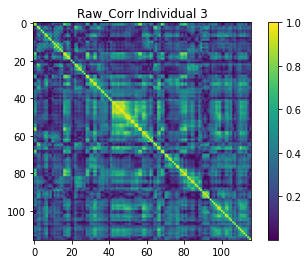

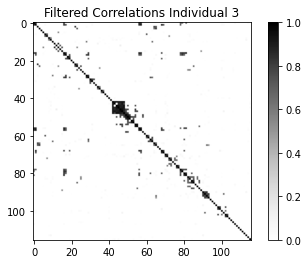

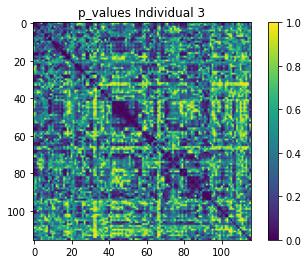

In [41]:
plot_summary(3)